# Support Vector Machines Projekt - Lösungen


Für dieses Projekt werden wir öffentlich verfügbare Daten von LendingClub.com verwenden. Lending Club bringt Leute zusammen, die Geld brauchen (Leihende) und solche, die Geld investieren möchten (Geldgeber). Als Investor möchte man dann verständlicherweise vor allem an die Leute sein Geld verleihen, die es mit einer hohen Wahrscheinlichkeit zurückzahlen. Wir werden versuchen ein Modell zu erstellen, dass bei dieser Vorhersage hilft.

Wir werden Daten von 2007 bis 2010 verwenden, bevor das Unternehmen an die Börse ging. Anhand der Daten werden wir versuchen vorherzusagen, ob ein Leihender das Geld zurückgezahlt hat oder nicht. Die Daten haben wir als CSV in den Kursunterlagen beigefügt. Diese Datei wurde bereits um die nicht verfügbaren Einträge gesäubert.

Schauen wir uns noch die verfügbaren Spalten an:

* credit.policy: 1 falls der Kunde die Risikobewertung besteht, 0 falls nicht.
* purpose: Der Zweck des Kredits (Werte sind "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", und "all_other").
* int.rate: Der Zinssatz des Kreidts als Anteil (eine Rate von 11% würde 0.11 sein). Kreditnehmer, die LendingClub.com als riskanter einstuft erhalten einen höheren Zins.
* installment: Die monatliche Zeilzahlung, die der Kreditnehmer leistet, wenn der Kredit finaziert wird.
* log.annual.inc: Der natürliche Log des angegebenen jährlichen Einkommens des Kreditnehmers.
* dti: Die "debt-to-income" Rate des Kreditnehmers (Kredit geteilt durch jährliches Einkommen.
* fico: Der FICO Kreditscore des Kreditnehmers.
* days.with.cr.line: Anzahl der Tage an denen der Kunde einen Dispokredit hatte.
* revol.bal: Die Bilanz am Ende eines Kreditkartenabrechnungszeitraums.
* revol.util: Der erstattete Anteil am Gesamtkredit.
* inq.last.6mths: Die Anzahl an Anfragen, die Kreditgeber in den letzten 6 Monaten an den Kreditnehmer gestellt haben.
* delinq.2yrs: Die Anzahl der Vorkommnisse eines Verzugs von über 30 Tagen innerhalb der letzten 2 Jahre.
* pub.rec: Die Anzahl an negativen Einträgen (Bankrott, Steuerverzug, Verurteilungen,...) des Kreditnehmers.

## Daten

** Öffne die loan_data.csv Datei und speichere es als ein Datenframe mit dem Namen `loans`.**

In [1]:
loans <- read.csv('loan_data.csv')

**Überprüfe die Zusammenfassung und Struktur von `loans`.**

In [53]:
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


In [54]:
summary(loans)

 credit.policy                 purpose        int.rate       installment    
 Min.   :0.000   all_other         :2331   Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   credit_card       :1262   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   debt_consolidation:3957   Median :0.1221   Median :268.95  
 Mean   :0.805   educational       : 343   Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000   home_improvement  : 629   3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000   major_purchase    : 437   Max.   :0.2164   Max.   :940.14  
                 small_business    : 619                                    
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd 

**Konvertiere die folgenden Spalten zu kategorischen Daten mit der `factor()` Funktion:**

* inq.last.6mths  
* delinq.2yrs      
* pub.rec          
* not.fully.paid 
* credit.policy

In [55]:
loans$credit.policy <- factor(loans$credit.policy)
loans$inq.last.6mths <- factor(loans$inq.last.6mths)
loans$delinq.2yrs <- factor(loans$delinq.2yrs)
loans$pub.rec <- factor(loans$pub.rec)
loans$not.fully.paid <- factor(loans$not.fully.paid)

# EDA

Lasst uns nun `ggplot 2` verwenden um die Daten zu visualisieren.

**Erstelle ein Histogramm der fico scores und verwende `not.fully.paid` als Farbskala.** 

In [56]:
library(ggplot2)

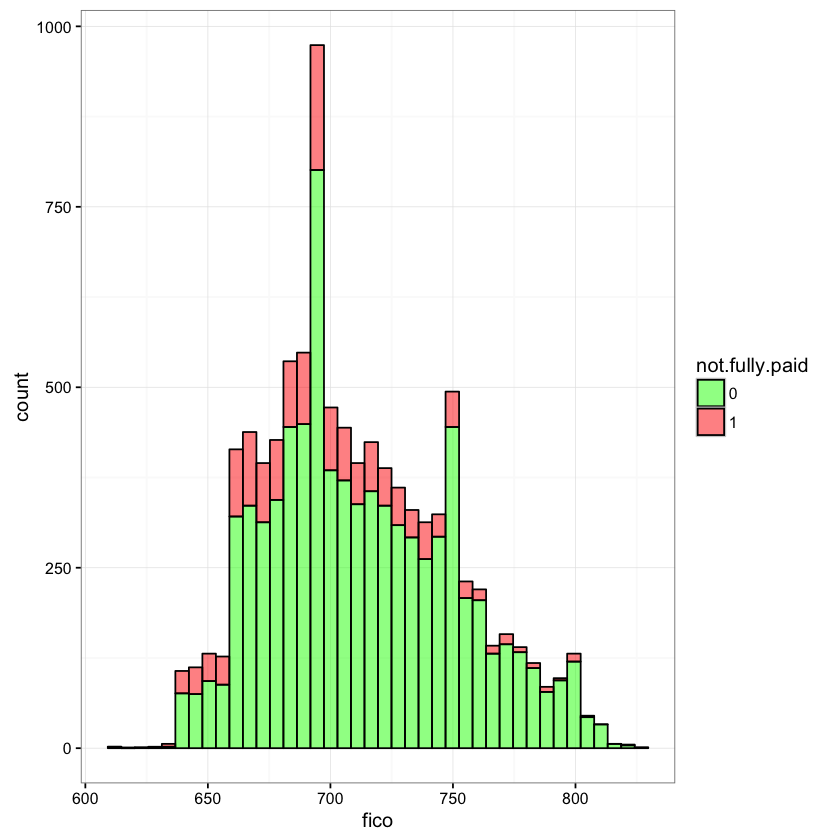

In [57]:
pl <- ggplot(loans,aes(x=fico)) 
pl <- pl + geom_histogram(aes(fill=not.fully.paid),color='black',bins=40,alpha=0.5)
pl + scale_fill_manual(values = c('green','red')) + theme_bw()

**Erstelle nun ein Balkendiagramm der `purpose` Counts und verwende `not.fully.paid` als Farbskala. Verwende `position=dodge`in dem `gnom_bar` Argument.** 

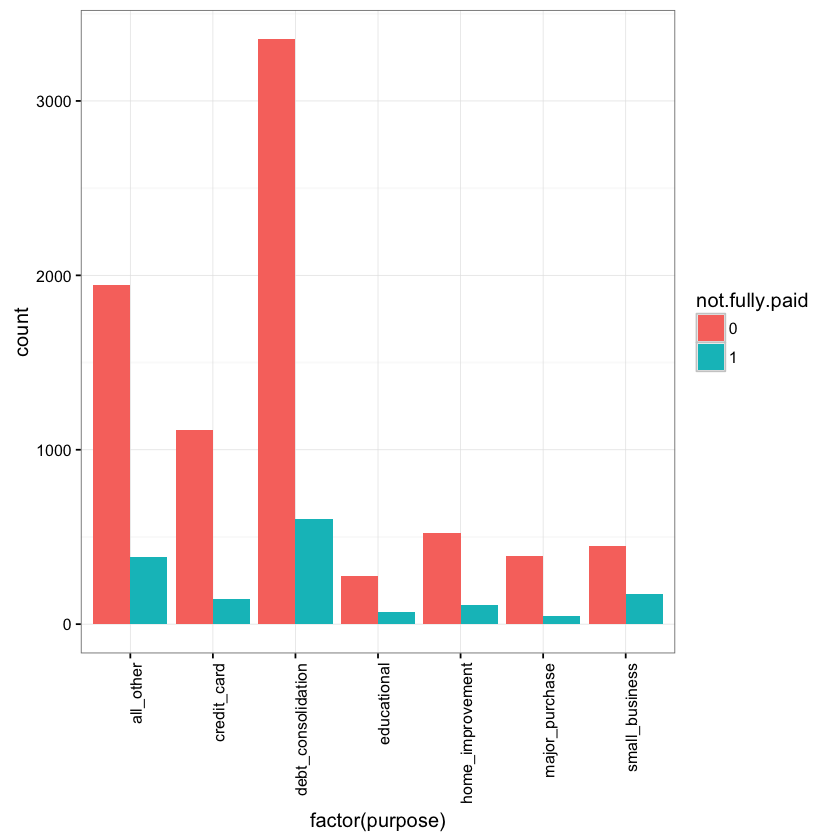

In [58]:
pl <- ggplot(loans,aes(x=factor(purpose))) 
pl <- pl + geom_bar(aes(fill=not.fully.paid),position = "dodge")
pl + theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

**Erstelle ein Streudiagramm des `fico scores` mit der `int.rate`. Macht dieser Trend Sinn? Du kannst hier gerne auch verschiedene Farbskalen ausprobieren.**



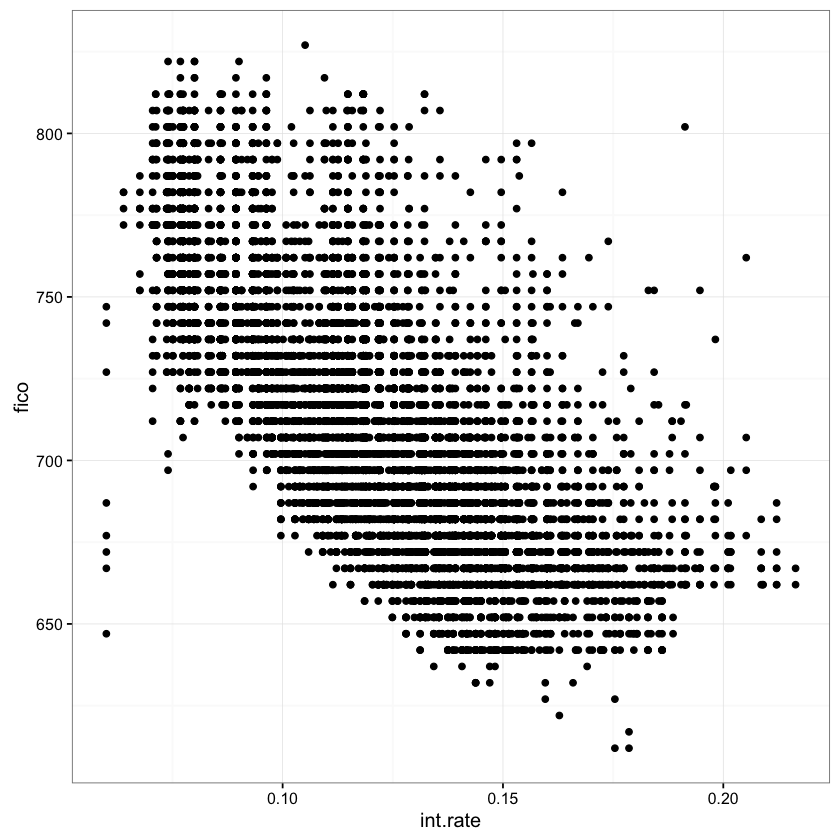

In [59]:
ggplot(loans,aes(int.rate,fico)) +geom_point() + theme_bw() 

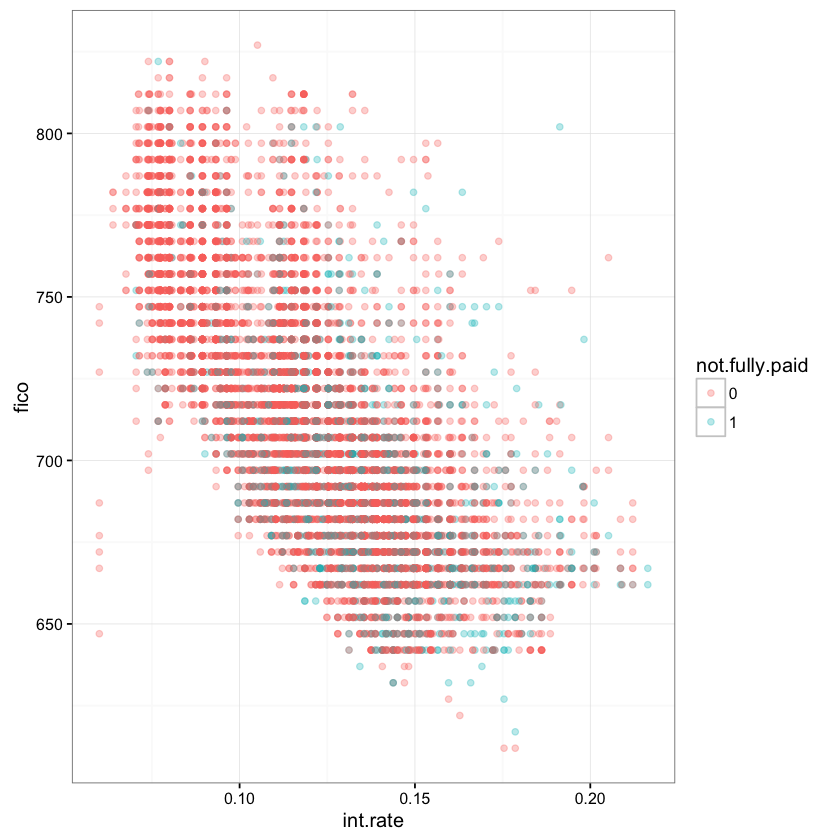

In [60]:
ggplot(loans,aes(int.rate,fico)) +geom_point(aes(color=not.fully.paid),alpha=0.3) + theme_bw()

## Das Modell erstellen

Nun ist es an der Zeit das Modell zu erstellen. 

### Trainings und Testdaten erstellen

**Unterteile deinen Datensatz in einen Trainings und einen Testdatensatz mit der `caTool` Library.**

In [61]:
library(caTools)

set.seed(101)

spl = sample.split(loans$not.fully.paid, 0.7)

train = subset(loans, spl == TRUE)

test = subset(loans, spl == FALSE)

** Rufe nun wie schon in der Vorlesung gezeigt die `e1071` Library auf.**

In [62]:
library(e1071)

** Verwende nun die `svm()` Funktion um ein Modell mit deinem Trainingsdatensatz zu trainieren.**

In [97]:
model <- svm(not.fully.paid ~ .,data=train)

** Erstelle die Zusammenfassung des Modells.**

In [98]:
summary(model)


Call:
svm(formula = not.fully.paid ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01724138 

Number of Support Vectors:  2849

 ( 1776 1073 )


Number of Classes:  2 

Levels: 
 0 1




**Verwende `predict` um neue Daten von deinem Datensatz vorherzusagen. Du kannst hier auch noch mal in die Vorlesung schauen, in der wir das Thema behandelt haben.**


In [99]:
predicted.values <- predict(model,test[1:13])

In [100]:
table(predicted.values,test$not.fully.paid)

                
predicted.values    0    1
               0 2413  460
               1    0    0

## Das Modell Optimieren

Du hast vermutlich schlechte Resultate bekommen, da das Modell alles in eine Gruppe klassifiziert hat. Lass uns nun das Modell optimieren. 

**Verwende die `tune()` Funktion um verschiedene `cost` und `gamma` Werte zu prüfen. In der Vorlesung haben wir gelernt, wie wir dies mit Hilfe von `train.x` und `train.y` machen können. Jedoch ist es meist einfacher eine Formel zu übergeben. Für mehr Details kannst du `help(tune)` ausführen.**

Dies ist das Ende des Projekts, da die Optimierung von Modellen sehr viel Zeit in Anspruch nehmen kann (da mehrere Modelle gleichzeitig laufen). Nimm dir hierfür soviel/so wenig Zeit wie du möchtest.

**Tipp: Deine `tune()`Funktion sollte ungefähr so aussehen:**

In [2]:
tune.results <- tune(svm,train.x=not.fully.paid~., data=train,kernel='radial',
                  ranges=list(cost=c(1,10), gamma=c(0.1,1)))

ERROR: Error in tune(svm, train.x = not.fully.paid ~ ., data = train, kernel = "radial", : could not find function "tune"


____

In [107]:
model <- svm(not.fully.paid ~ .,data=train,cost=10,gamma = 0.1)
predicted.values <- predict(model,test[1:13])
table(predicted.values,test$not.fully.paid)

                
predicted.values    0    1
               0 2350  425
               1   63   35

## Gut gemacht!